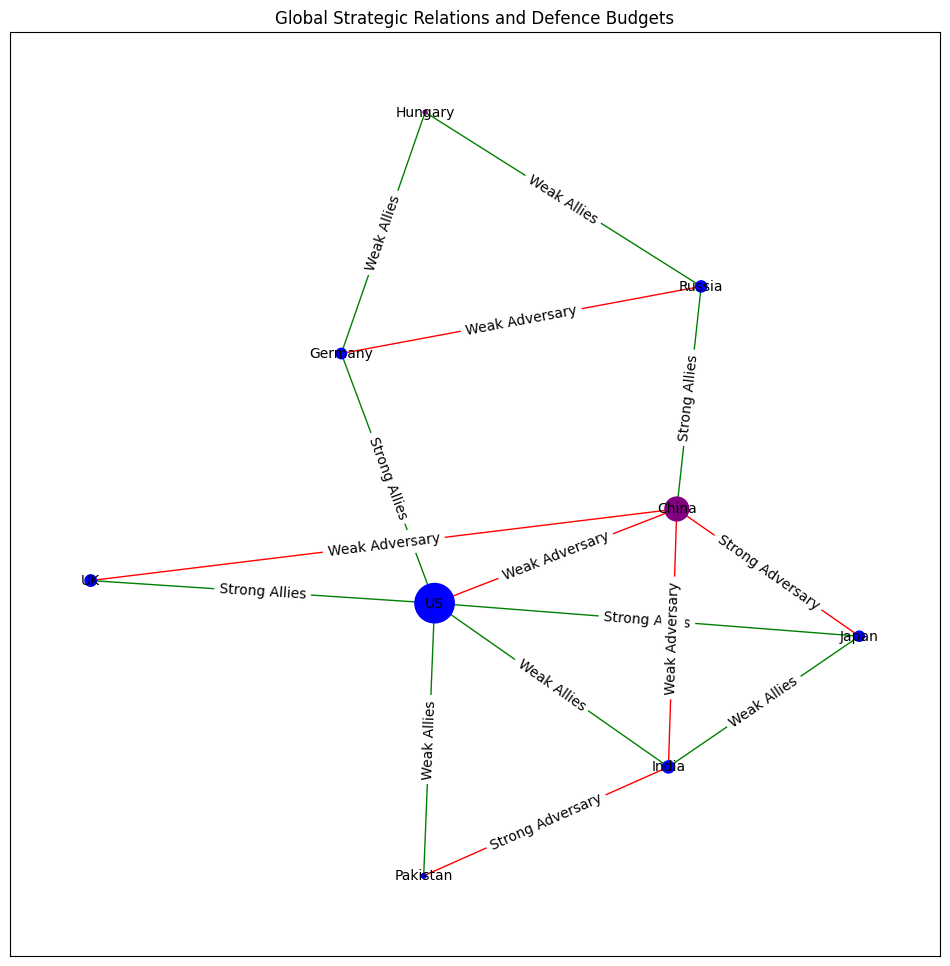

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Data input
countries = {
    'US': {'defence': 801, 'political': 'Strong democracy'},
    'China': {'defence': 293, 'political': 'Strong communism'},
    'India': {'defence': 76, 'political': 'Strong democracy'},
    'UK': {'defence': 68, 'political': 'Strong democracy'},
    'Russia': {'defence': 65, 'political': 'Weak democracy'},
    'Germany': {'defence': 56, 'political': 'Strong democracy'},
    'Japan': {'defence': 54, 'political': 'Strong democracy'},
    'Pakistan': {'defence': 12, 'political': 'Weak democracy'},
    'Hungary': {'defence': 8, 'political': 'Weak communism'}
}

relations = [
    ('Hungary', 'Russia', 'Weak Allies'),
    ('US', 'UK', 'Strong Allies'),
    ('India', 'Pakistan', 'Strong Adversary'),
    ('China', 'Japan', 'Strong Adversary'),
    ('US', 'Japan', 'Strong Allies'),
    ('India', 'China', 'Weak Adversary'),
    ('China', 'US', 'Weak Adversary'),
    ('China', 'UK', 'Weak Adversary'),
    ('China', 'Russia', 'Strong Allies'),
    ('India', 'Japan', 'Weak Allies'),
    ('Germany', 'US', 'Strong Allies'),
    ('Hungary', 'Germany', 'Weak Allies'),
    ('India', 'US', 'Weak Allies'),
    ('Pakistan', 'US', 'Weak Allies'),
    ('Russia', 'Germany', 'Weak Adversary')
]

# Create a graph
G = nx.Graph()

# Add nodes with attributes
for country, data in countries.items():
    G.add_node(country, defence=data['defence'], political=data['political'])

# Add edges with relations
for source, target, relation in relations:
    weight = 2 if "Strong" in relation else 1
    color = 'green' if "Allies" in relation else 'red'
    G.add_edge(source, target, weight=weight, color=color, label=relation)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
node_sizes = [countries[node]['defence'] for node in G.nodes]
node_colors = ['blue' if 'democracy' in countries[node]['political'] else 'purple' for node in G.nodes]
edge_colors = nx.get_edge_attributes(G, 'color').values()

plt.figure(figsize=(12, 12))
nx.draw_networkx(
    G, pos, 
    node_size=node_sizes, 
    node_color=node_colors, 
    edge_color=edge_colors, 
    with_labels=True, 
    font_size=10
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))
plt.title('Global Strategic Relations and Defence Budgets')
plt.savefig('GlobalstrategicRelation_and_DefenceBudget')
plt.show()


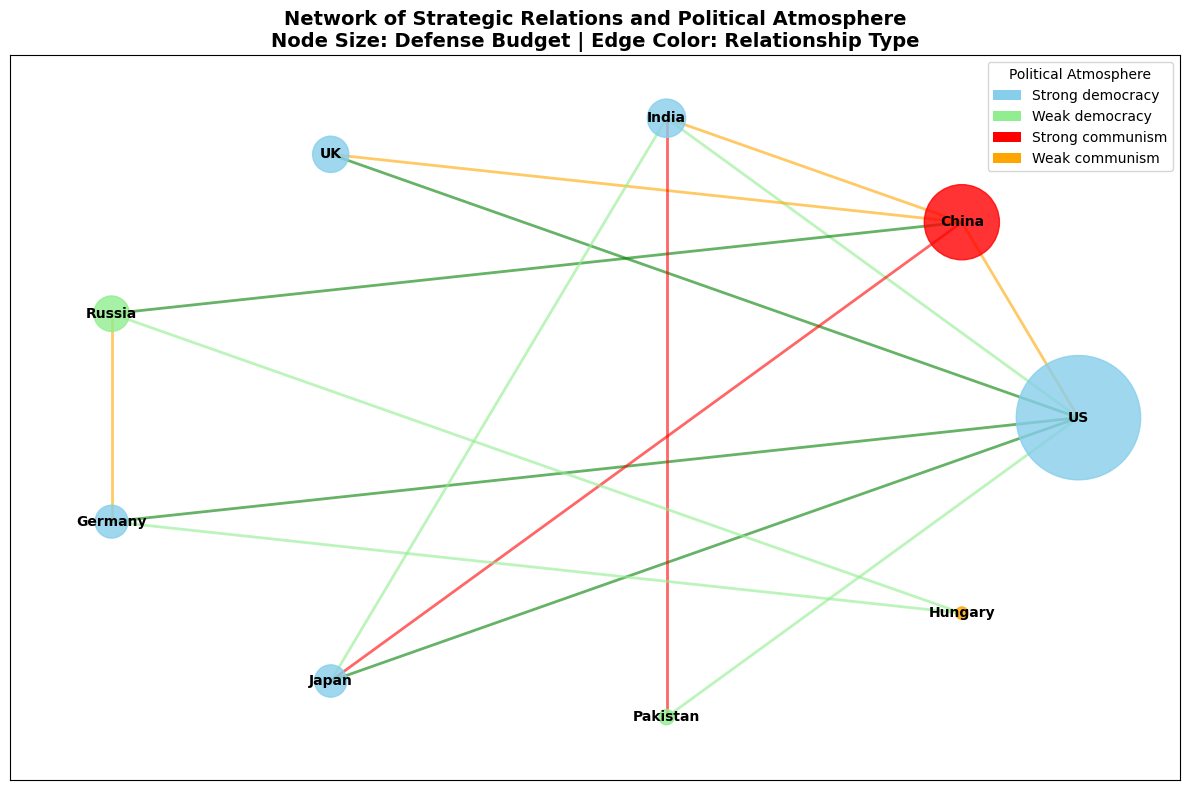

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load Data from Files
def read_political_atmosphere(file_path):
    political_atmosphere = {}
    with open(file_path, "r") as file:
        for line in file:
            country, atmosphere = line.strip().split(" -> ")
            political_atmosphere[country] = atmosphere
    return political_atmosphere

def read_strategic_relations(file_path):
    relations = []
    with open(file_path, "r") as file:
        for line in file:
            country1, country2, relation = line.strip("[]\n").split(", ")
            relations.append((country1, country2, relation))
    return relations

def read_defense_budget(file_path):
    defense_budget = {}
    with open(file_path, "r") as file:
        for line in file:
            data = line.strip().split(" ")
            country, budget = data[0], int(data[1].replace("bn", ""))
            defense_budget[country] = budget
    return defense_budget

# File paths
political_file = "Political_Atmosphere.txt"
relations_file = "Strategic_Relations.txt"
defense_file = "Annual_Defence.txt"

# Read data
political_atmosphere = read_political_atmosphere(political_file)
relations = read_strategic_relations(relations_file)
defense_budget = read_defense_budget(defense_file)

# Step 2: Create the Network Graph
G = nx.Graph()

# Add nodes with attributes: political atmosphere and defense budget
for country, atmosphere in political_atmosphere.items():
    G.add_node(country, atmosphere=atmosphere, budget=defense_budget.get(country, 0))

# Add edges with relationships
for country1, country2, relation in relations:
    G.add_edge(country1, country2, relation=relation)

# Step 3: Node and Edge Attributes
# Node size based on defense budget
node_sizes = [G.nodes[node]["budget"] * 10 for node in G.nodes()]
# Node color based on political atmosphere
color_map = {
    "Strong democracy": "skyblue",
    "Weak democracy": "lightgreen",
    "Strong communism": "red",
    "Weak communism": "orange"
}
node_colors = [color_map[G.nodes[node]["atmosphere"]] for node in G.nodes()]

# Edge styles based on relationship types
edge_colors = []
for u, v, attr in G.edges(data=True):
    if attr["relation"] == "Strong Allies":
        edge_colors.append("green")
    elif attr["relation"] == "Weak Allies":
        edge_colors.append("lightgreen")
    elif attr["relation"] == "Strong Adversary":
        edge_colors.append("red")
    elif attr["relation"] == "Weak Adversary":
        edge_colors.append("orange")

# Step 4: Draw the Network
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)  # Circular layout for better visualization

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Add a legend for node colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) for label, color in color_map.items()]
plt.legend(handles=legend_elements, loc="upper right", title="Political Atmosphere")

# Title and Display
plt.title("Network of Strategic Relations and Political Atmosphere\nNode Size: Defense Budget | Edge Color: Relationship Type", fontsize=14, weight="bold")
plt.tight_layout()
plt.savefig("network_plot.png", bbox_inches="tight")
plt.show()


{'US': 801}

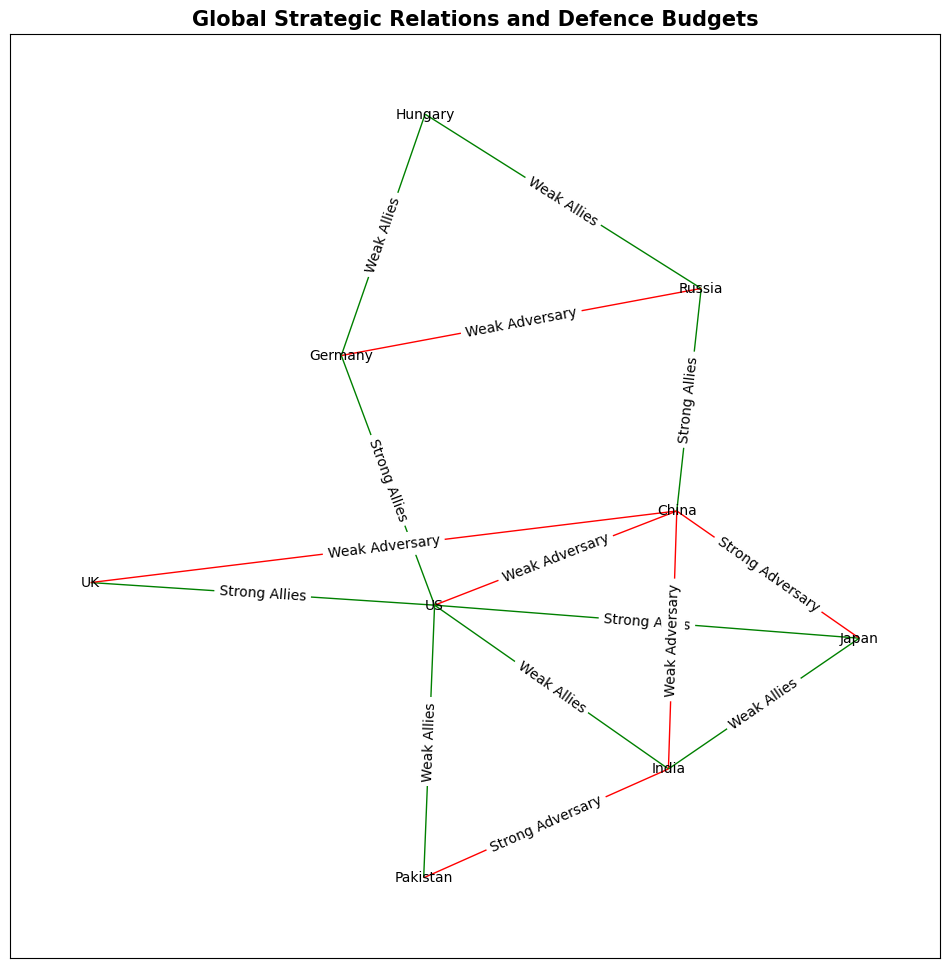

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to read political atmosphere file
def read_political_atmosphere(file_path):
    """Reads political atmosphere into a dictionary."""
    political_atmosphere = {}
    with open(file_path, "r") as file:
        for line in file:
            if "->" in line:
                country, atmosphere = line.strip().split(" -> ")
                political_atmosphere[country] = atmosphere
    return political_atmosphere

# Function to read strategic relations file
def read_strategic_relations(file_path):
    """Reads strategic relations into a list of tuples."""
    relations = []
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip("[]\n").split(", ")
            if len(parts) == 3:
                relations.append((parts[0], parts[1], parts[2]))
    return relations

# Function to read defense budget file
def read_defense_budget(file_path):
    """Reads annual defense data into a dictionary."""
    defense_budget = {}
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                country, budget = parts[0], int(parts[1].replace("bn", ""))
                defense_budget[country] = budget
    return defense_budget


# File paths
political_file = "Political_Atmosphere.txt"
relations_file = "Strategic_Relations.txt"
defense_file = "Annual_Defence.txt"

# Read data from files
political_atmosphere = read_political_atmosphere(political_file)
relations = read_strategic_relations(relations_file)
defense_budget = read_defense_budget(defense_file)

# Create a network graph
G = nx.Graph()

# Add nodes with attributes
for country, atmosphere in political_atmosphere.items():
    G.add_node(
        country, 
        defence=defense_budget.get(country, 0), 
        political=atmosphere
    )

# Add edges with attributes
for source, target, relation in relations:
    weight = 2 if "Strong" in relation else 1
    color = 'green' if "Allies" in relation else 'red'
    G.add_edge(source, target, weight=weight, color=color, label=relation)

# Visualization parameters
node_sizes = [G.nodes[node]['defence'] * 10 for node in G.nodes()]
node_colors = [
    'blue' if 'democracy' in G.nodes[node]['political'].lower() else 'purple'
    for node in G.nodes()
]
edge_colors = [G.edges[edge]['color'] for edge in G.edges()]
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    font_size=10
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))

# Title and Save
plt.title('Global Strategic Relations and Defence Budgets', fontsize=15, weight="bold")
plt.savefig('Global_Strategic_Relations_and_Defence_Budgets.png', bbox_inches="tight")
plt.show()


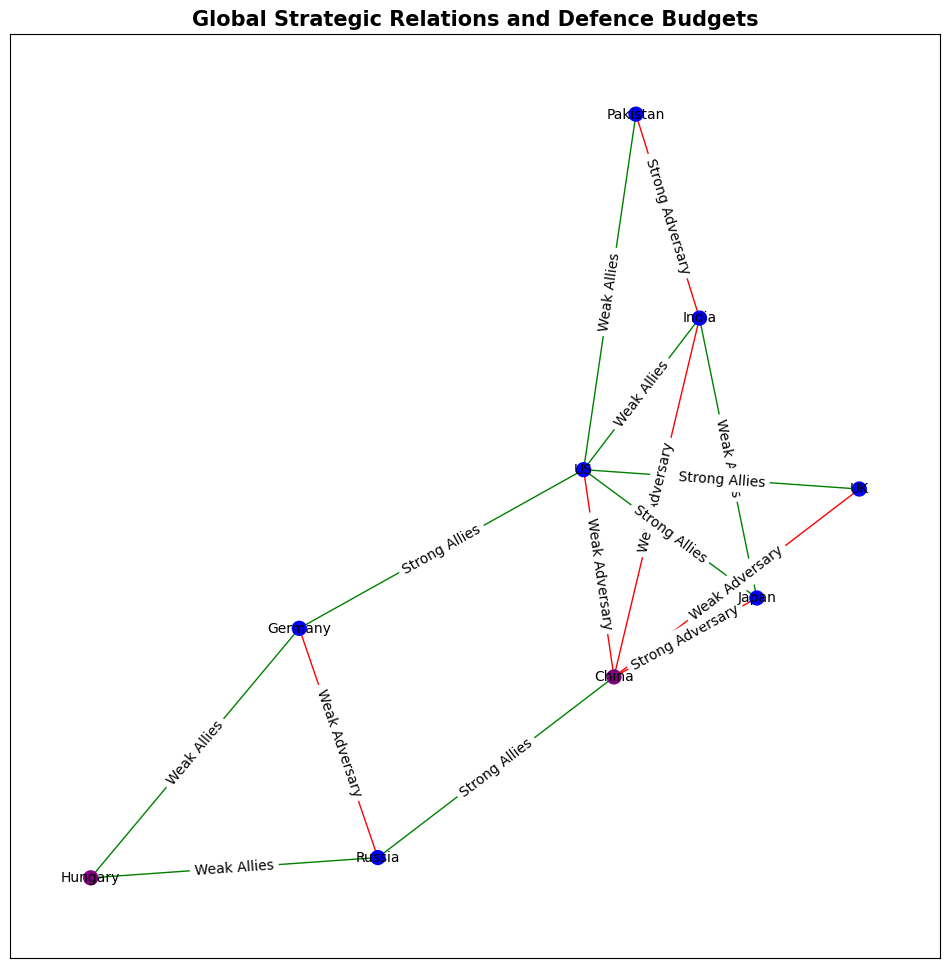

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to read political atmosphere file
def read_political_atmosphere(file_path):
    """Reads political atmosphere into a dictionary."""
    political_atmosphere = {}
    with open(file_path, "r") as file:
        for line in file:
            if "->" in line:
                country, atmosphere = line.strip().split(" -> ")
                political_atmosphere[country] = atmosphere
    return political_atmosphere

# Function to read strategic relations file
def read_strategic_relations(file_path):
    """Reads strategic relations into a list of tuples."""
    relations = []
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip("[]\n").split(", ")
            if len(parts) == 3:
                relations.append((parts[0], parts[1], parts[2]))
    return relations

# Function to read defense budget file
def read_defense_budget(file_path):
    """Reads annual defense data into a dictionary."""
    defense_budget = {}
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                country, budget = parts[0], int(parts[1].replace("bn", ""))
                defense_budget[country] = budget
    return defense_budget


# File paths
political_file = "Political_Atmosphere.txt"
relations_file = "Strategic_Relations.txt"
defense_file = "Annual_Defence.txt"

# Step 1: Read data
political_atmosphere = read_political_atmosphere(political_file)
relations = read_strategic_relations(relations_file)
defense_budget = read_defense_budget(defense_file)

# Step 2: Build a complete set of countries
all_countries = set(political_atmosphere.keys())  # Countries with political data
for relation in relations:  # Countries mentioned in relations
    all_countries.update([relation[0], relation[1]])
for country in defense_budget.keys():  # Countries with defense budgets
    all_countries.add(country)

# Step 3: Create the network graph
G = nx.Graph()

# Add nodes with attributes (default values for missing data)
for country in all_countries:
    G.add_node(
        country,
        defence=defense_budget.get(country, 10),  # Default budget = 10
        political=political_atmosphere.get(country, "Unknown")
    )

# Add edges with attributes
for source, target, relation in relations:
    weight = 2 if "Strong" in relation else 1
    color = 'green' if "Allies" in relation else 'red'
    G.add_edge(source, target, weight=weight, color=color, label=relation)

# Visualization parameters
node_sizes = [G.nodes[node]['defence'] * 10 for node in G.nodes()]
node_colors = [
    'blue' if 'democracy' in G.nodes[node]['political'].lower() else 
    'purple' if 'communism' in G.nodes[node]['political'].lower() else 'gray'
    for node in G.nodes()
]
edge_colors = [G.edges[edge]['color'] for edge in G.edges()]
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color=edge_colors,
    with_labels=True,
    font_size=10,
    font_color='black'
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))

# Title and Save
plt.title("Global Strategic Relations and Defence Budgets", fontsize=15, weight="bold")
plt.savefig('Global_Strategic_Relations_and_Defence_Budgets.png', bbox_inches="tight")
plt.show()
